In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dataset=pd.read_csv('car_purchasing.csv',encoding="latin1")

In [36]:
y=dataset['car purchase amount']


In [40]:
dataset.drop(['car purchase amount'],axis =1)

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [41]:
dataset.head(10)


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [35]:
dataset=dataset.drop(['customer name','customer e-mail','country'],axis=1)

In [59]:
y.shape 


(500,)

In [45]:
X=dataset

In [42]:
# splitting the data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [44]:
# Scalling the data X

In [61]:
scale=StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Reshaping the y values because it's countinous and largers number 
y_train=y_train.values.reshape(-1,1);
y_test=y_test.values.reshape(-1,1);
# Now lets scale it for better outcome
y_train=scale.fit_transform(y_train)
y_test=scale.transform(y_test)

In [47]:
# building the model

In [62]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential()

model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

C:\Users\91620\OneDrive\Desktop\PyTorch\my_keras_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
temp=model.fit(X_train,y_train,epochs=10,batch_size=100,validation_split=0.2)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 1.0919 - mse: 1.0919 - val_loss: 0.7733 - val_mse: 0.7733
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8317 - mse: 0.8317 - val_loss: 0.5755 - val_mse: 0.5755
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6297 - mse: 0.6297 - val_loss: 0.4174 - val_mse: 0.4174
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4665 - mse: 0.4665 - val_loss: 0.2917 - val_mse: 0.2917
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3268 - mse: 0.3268 - val_loss: 0.1963 - val_mse: 0.1963
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2147 - mse: 0.2147 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1334 - mse: 0.1334 - val_loss: 0.0722 - val_mse: 0.0722
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0750 - mse: 0.0750 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0402 - mse: 0.0402 - 

In [65]:
y_pred=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [69]:
# Lets Inverse the scaled Y_test and y_prediction
y_pred=scale.inverse_transform(y_pred)
y_test=scale.inverse_transform(y_test)

In [72]:
# Now comparing the model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [75]:
print (np.sqrt((mean_squared_error(y_pred,y_test))))
print(mean_absolute_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

1696.9637718188326
1288.1716661375
0.9734795659918167


In [76]:
# Lets visualise 

Text(0, 0.5, 'Predicted')

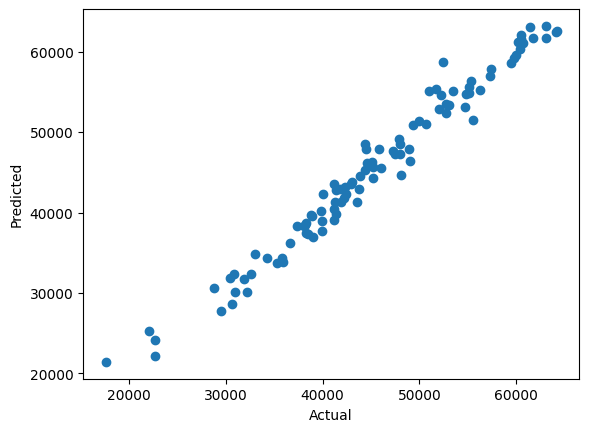

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [78]:
# Observation : From this model , our prediction is about 97% correct 